In [2]:
# Dependencies
import pandas as pd
import numpy as np
import datetime as dt


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6)
session.query(Measurement.date,Measurement.tobs).filter(extract('month', Measurement.date)==6)
#results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [6]:
#  3. Convert the June temperatures to a list.
results=[]
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
Month_jun_df = pd.DataFrame(results, columns=['Date','June Temps'])
Month_jun_df

,Date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
Month_jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date,Measurement.tobs).filter(extract('Month', Measurement.date)==12)

In [10]:
# 7. Convert the December temperatures to a list.
results=[]
results = session.query(Measurement.date,Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Month_dec_df=pd.DataFrame(results, columns=['Date','December Temps'])
Month_dec_df

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Month_dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Provide a high-level summary of the results and two additional queries that you would perform to gather more weather data for June and December.

### 1.Box-Whiskers plot for June and December tempratures

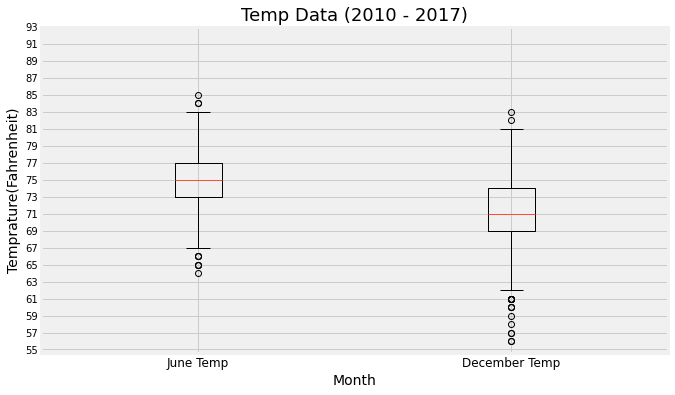

In [13]:
#Box-Whiskers plot for june and dec temprature

#Plot the Box & Whiskers
x_labels = ["June Temp", "December Temp"]
temps = [Month_jun_df["June Temps"], Month_dec_df["December Temps"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)

#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(55, 95, step=2.0))
ax.set_title('Temp Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Temprature(Fahrenheit)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

plt.savefig("PNG's\Temp_data(2010-2017).png")
plt.show()

### 2. Calc_temp function which will retrieve minimum, average, and maximum temperatures for range '2010-01-01'- '2017-30-12'

In [14]:
# Function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
min_max_avg = (calc_temps('2010-01-01', '2017-30-12'))

print(min_max_avg)

[(53.0, 87.0, 73.09795396419437)]


### 3. Design a query to retrieve the of Average tobs data and plot the results.

In [15]:
# Design a query to retrieve the of Average tobs data and plot the results. 
#Starting from the first data point in the dataset. 

Start_date = dt.date(2010, 1, 1)

# Calculate the date one month from the first date in data set.
End_date = dt.date(2017, 12, 30)

# Perform a query to retrieve the date and tobs scores

results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= Start_date).\
filter(Measurement.date <= End_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

tobs_df = pd.DataFrame(results, columns=['date','tobs'])
tobs_df_index = tobs_df.set_index(tobs_df['date'], inplace=False)

#sort by dates
tobs_df_index=tobs_df_index.sort_index()

#set the date to the date datatype
tobs_df_index.index = pd.to_datetime(tobs_df_index.index)

#Average tobs "Group by year"
tobs_df_index_year= tobs_df_index.resample("Y").mean()
tobs_df_index_year

,tobs
date,
2010-12-31,0.138523
2011-12-31,0.163735
2012-12-31,0.116381
2013-12-31,0.155546
2014-12-31,0.178560
2015-12-31,0.199200
2016-12-31,0.179845
2017-12-31,0.165927


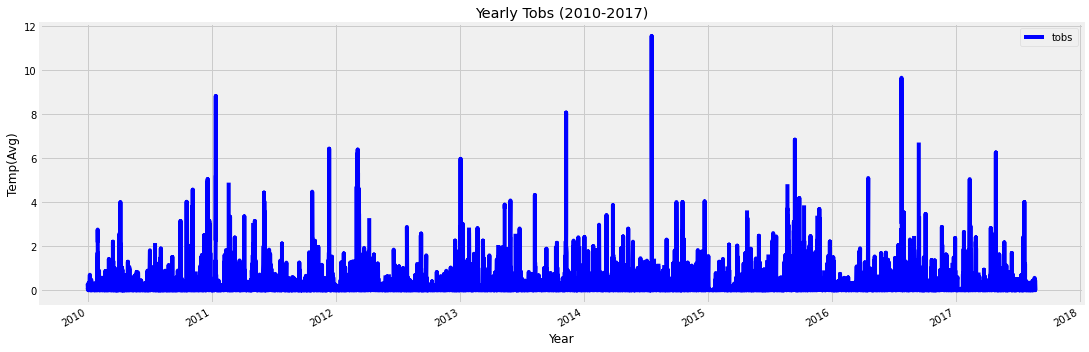

In [16]:
#Plot the results. 
tobs_df_index.plot(figsize=(15,5),c="blue")
plt.title("Yearly Tobs (2010-2017)")

plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Temp(Avg)')

plt.savefig("PNG's\Yearly Tobs(2010-2017).png")
plt.show()

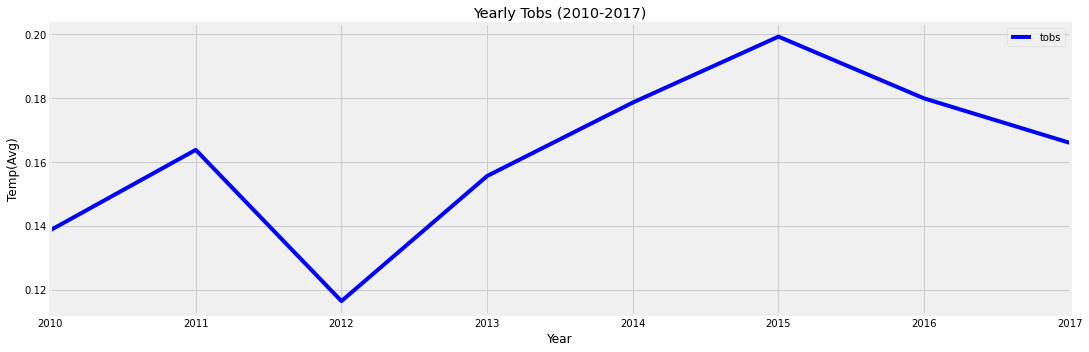

In [17]:
#Plot the results. 
tobs_df_index_year.plot(figsize=(15,5),c="blue")
plt.title("Yearly Tobs (2010-2017)")
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Temp(Avg)')

plt.savefig("PNG's\Yearly Index Tobs(2010-2017).png")
plt.show()

### 4.Precipitation for June and December with descriptive statistics

In [18]:
### Descriptive Statistics
# Calculate percipitation statistics for June

session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date) == 6).all()
results=[]
results=session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date) == 6).all()
Month_jun_prcp_df=pd.DataFrame(results,columns=['Date','June Precipitation'])
Month_jun_prcp_df

,Date,June Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [19]:
Month_jun_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [20]:
# Calculate percipitation statistics for December

session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date) == 12).all()
results=[]
results=session.query(Measurement.date, Measurement.prcp).filter(extract('month',Measurement.date) == 12).all()
Month_dec_prcp_df=pd.DataFrame(results,columns=['Date','DEC Precipitation'])
Month_dec_prcp_df

,Date,DEC Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [21]:
#check the null values:
Month_dec_prcp_df.count()
Month_dec_prcp_df.isnull().sum()

Date                   0
DEC Precipitation    112
dtype: int64

In [22]:
#Drop the null values:
Month_jun_prcp_df = Month_jun_prcp_df.dropna()

Month_dec_prcp_df = Month_dec_prcp_df.dropna()

In [23]:
Month_jun_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [24]:
Month_dec_prcp_df.describe()

,DEC Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


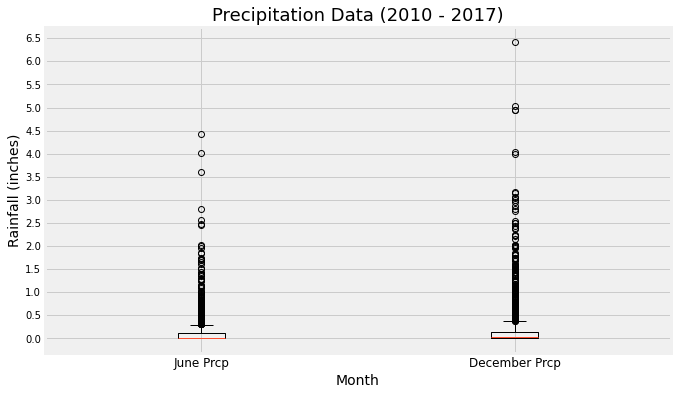

In [25]:
#Box-Whiskers plot for june and dec Precipitation("Rainfall")
#Plot the Box & Whiskers
x_labels = ["June Prcp", "December Prcp"]
temps = [Month_jun_prcp_df["June Precipitation"], Month_dec_prcp_df["DEC Precipitation"]]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(temps, labels=x_labels)

#Ticks & Labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(0,7,step=0.5))
ax.set_title('Precipitation Data (2010 - 2017)',fontsize=18)
ax.set_ylabel('Rainfall (inches)',fontsize=14)
ax.set_xlabel("Month",fontsize=14)

plt.savefig("PNG's\Precipitation Data (2010-2017).png")
plt.show()

In [26]:
#Count the number of the outliers
#Calculate the sum of outliers_June
# Calculate the outliers
Q1_june = Month_jun_prcp_df["June Precipitation"].quantile(0.25)
Q3_june = Month_jun_prcp_df["June Precipitation"].quantile(0.75)
IQR_june = (Month_jun_prcp_df["June Precipitation"].quantile(0.75)) - (Month_jun_prcp_df["June Precipitation"].quantile(0.25))
#Calculate the sum of outliers
sum_of_outliers_june = ((Month_jun_prcp_df["June Precipitation"] < (Q1_june - 1.5 * IQR_june))
                        | (Month_jun_prcp_df["June Precipitation"] > (Q3_june + 1.5 * IQR_june))).sum()

sum_of_outliers_june

183

In [27]:
#Count the number of the outliers
#Calculate the sum of outliers_December
# Calculate the outliers
Q1_dec = Month_dec_prcp_df["DEC Precipitation"].quantile(0.25)
Q3_dec = Month_dec_prcp_df["DEC Precipitation"].quantile(0.75)
IQR_dec = (Month_dec_prcp_df["DEC Precipitation"].quantile(0.75)) - (Month_dec_prcp_df["DEC Precipitation"].quantile(0.25))
#Calculate the sum of outliers
sum_of_outliers_dec = ((Month_dec_prcp_df["DEC Precipitation"] < (Q1_dec - 1.5 * IQR_dec))
                        | (Month_dec_prcp_df["DEC Precipitation"] > (Q3_dec + 1.5 * IQR_dec))).sum()
sum_of_outliers_dec

205